In [128]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
from torch.optim import Adam
import torch.nn as nn
from __future__ import division
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer
import sys
import gc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [129]:
!ls

20N_SDscore_header.tab       X_train.npy
20N_pairprobL_header.tab     Y_test.npy
20N_pairprobR_header.tab     Y_train.npy
20N_totalfold.tab            examples
20N_windfold_header.tab      nar-01502-y-2016-File012.xls
NN20.ipynb                   nar-01502-y-2016-File014.xls
X_test.npy                   promotors.txt


In [130]:
print len("AAAAAAAAGUGGGAACUAUCAUG")

23


In [131]:
pd.read_excel("nar-01502-y-2016-File012.xls").sort_values("Sequence")

,Sequence,F1,F2,F3,F4,F5,F6,F7,F8
0,AAAAAAAAGUGGGAACUAUCAUG,0,0,0,0,21,0,0,0
1,AAAAAAAGAAGGGAAAAAGGAUG,0,0,35,0,0,0,0,0
2,AAAAAAAGAGGACUAUGAAAAUG,0,0,0,0,0,0,27,0
3,AAAAAAAUAGCUCCAAAUGAAUG,0,18,0,0,0,0,0,0
4,AAAAAACGAGGAUUGAAGAAAUG,0,0,0,0,0,21,0,0
5,AAAAAACGGGAGGAAAGUAAAUG,0,0,0,0,0,0,0,325
6,AAAAAACGGUGAAAAAAAUAAUG,0,0,0,28,0,0,0,0
7,AAAAAACUACAUGAUCAGCAAUG,0,24,0,0,0,0,0,0
8,AAAAAACUGAAGAGAGUAUUAUG,0,0,0,0,29,0,0,0
9,AAAAAAGAGUAAAGACCAUUAUG,0,0,0,13,0,0,0,0


In [132]:

table1 = pd.read_table("20N_SDscore_header.tab")

<h1> Prepare Y data

In [133]:
Y = pd.read_excel("nar-01502-y-2016-File012.xls")

In [134]:
Y.head()

,Sequence,F1,F2,F3,F4,F5,F6,F7,F8
0,AAAAAAAAGUGGGAACUAUCAUG,0,0,0,0,21,0,0,0
1,AAAAAAAGAAGGGAAAAAGGAUG,0,0,35,0,0,0,0,0
2,AAAAAAAGAGGACUAUGAAAAUG,0,0,0,0,0,0,27,0
3,AAAAAAAUAGCUCCAAAUGAAUG,0,18,0,0,0,0,0,0
4,AAAAAACGAGGAUUGAAGAAAUG,0,0,0,0,0,21,0,0


In [135]:
Y = Y[["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8"]].as_matrix()

In [136]:
Y_processed = np.zeros(Y.shape[0])

In [137]:
Y_norm = Y / Y.sum(axis=1, keepdims=True)

In [138]:
Y_norm[Y_norm < 0.05] = 0  # remove noise 

In [139]:
Y_aim = np.zeros(Y_norm.shape[0], dtype=np.uint8)
Y_aim[Y_norm[:,-1] != 0] = 7
Y_aim[(Y_norm[:, -2] != 0) * (Y_aim == 0)] = 6
Y_aim[(Y_norm[:, -3] != 0) * (Y_aim == 0)] = 5
Y_aim[(Y_norm[:, -4] != 0) * (Y_aim == 0)] = 4
Y_aim[(Y_norm[:, -5] != 0) * (Y_aim == 0)] = 3
Y_aim[(Y_norm[:, -6] != 0) * (Y_aim == 0)] = 2
Y_aim[(Y_norm[:, -7] != 0) * (Y_aim == 0)] = 1


<h1> Prepare features

In [140]:
!ls

20N_SDscore_header.tab       X_train.npy
20N_pairprobL_header.tab     Y_test.npy
20N_pairprobR_header.tab     Y_train.npy
20N_totalfold.tab            examples
20N_windfold_header.tab      nar-01502-y-2016-File012.xls
NN20.ipynb                   nar-01502-y-2016-File014.xls
X_test.npy                   promotors.txt


In [141]:
data_tables = ["20N_SDscore_header.tab", "20N_pairprobL_header.tab", "20N_pairprobR_header.tab", "20N_totalfold.tab",\
              "20N_windfold_header.tab"]



In [142]:
X = np.concatenate([pd.read_table(dt, skiprows=0).iloc[:, 1:] for dt in data_tables], axis = 1 )

<h2> Train/test split

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_aim, test_size=0.33)

In [144]:
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("Y_train.npy", Y_train)
np.save("Y_test.npy", Y_test)

<h1> Help functions

In [145]:
#was copied from previous homework
def print_work_time(func):
    def wrapper(*args, **kwargs):
        start = timer()
        result = func(*args, **kwargs)
        end = timer()
        print("Execution take {}".format(end - start))
        return result
    return wrapper

@print_work_time
def learn_on_model(X, Y, model, loss_fn, optimizer, X_test = None, Y_test = None, learning_rate = 1e-2, 
                   batch_size = 100, max_epoch_num = 1, min_loss = 1e-3): 
    loss = 1000
    epoch_num = 0
     
    loss_arr = list()

    test_loss_arr = list() if not (type(X_test) is None) else None
    tot_err = 10**6
    
    while tot_err > min_loss and epoch_num < max_epoch_num:
        tot_err = 0
        sys.stdout.write("\nEpoch {} ...\n".format(epoch_num + 1))
        for bn, start in enumerate(xrange(0, X.shape[0], batch_size)):
            optimizer.zero_grad()
            if bn % 10 == 0:
                sys.stdout.write("\rTrain Batch {}".format(bn))
            X_CUR = Variable(torch.from_numpy(X[start:start + batch_size]).type(torch.FloatTensor))
            Y_CUR = Variable(torch.from_numpy(Y[start:start + batch_size]).type(torch.LongTensor), requires_grad=False)
            output =  model.forward(X_CUR)
            loss = loss_fn(output, Y_CUR)
            loss_arr.append(loss.data.tolist()[0])
            tot_err += loss
            loss.backward()
            optimizer.step()
            del loss
            del X_CUR
            del Y_CUR
            del output

        
        if not (type(X_test) is None):
            for bn, start in enumerate(xrange(0, X_test.shape[0], batch_size)):
                if bn % 10 == 0:
                    sys.stdout.write("\rTest Batch {}".format(bn))
                X_CUR = Variable(torch.from_numpy(X_test[start:start + batch_size]).type(torch.FloatTensor))
                Y_CUR = Variable(torch.from_numpy(Y_test[start:start + batch_size]).type(torch.LongTensor), requires_grad=False)
                y_pred = model.forward(X_CUR)
                loss = loss_fn(y_pred, Y_CUR)
                test_loss_arr.append(loss.data.tolist()[0])
                del X_CUR
                del Y_CUR
                del y_pred
                del loss
            
            
        epoch_num += 1
        gc.collect() # only this've helped to save process from beeing kill
        clear_output(wait=True)
    return np.array(loss_arr), np.array(test_loss_arr)

def draw_plots(model, loss_arr, layer_arr, test_loss_arr, show_weights = False):
    x = np.arange(loss_arr.shape[0]);
    number_of_plots = 1 + sum(len(x) for x in layer_arr)
    gridSize = number_of_plots
    plt.figure(figsize=(15, 6 * number_of_plots))
    
    plotId = 1
    subpl = plt.subplot(gridSize, 1, plotId)
    if not type(test_loss_arr) is None:
        subpl.plot(x, loss_arr, x, test_loss_arr)
        subpl.legend(["Train", "Test"])
    else:
        subpl.plot(x, loss_arr)
    subpl.set_xticks(range(x.shape[0]))
    subpl.set_title("Loss function")
    subpl.set_xlabel("Epoch num")
    subpl.set_ylabel("Loss func")
    if show_weights:
        for ind1, child in enumerate(model.children()):
            for ind2, key in enumerate(child.state_dict().keys()):
                plotId += 1
                subpl = plt.subplot(gridSize, 1, plotId)
                y = layer_arr[ind1][ind2]
                subpl.plot(x, y)

                subpl.set_xticks(range(x.shape[0]))
                subpl.set_title("Layer {} : {} gradient norm".format(ind1 + 1, key))
                subpl.set_xlabel("Epoch num")
                subpl.set_ylabel(key + "_grad")
    
    plt.show()

from sklearn.metrics import classification_report

def make_classification_report(model, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, batch_size = 100):
    print ("Train report")
    y_predicted = np.zeros(shape = (Y_TRAIN.shape[0], len(np.unique(Y_TRAIN))))
    
    for bn, start in enumerate(xrange(0, X_TRAIN.shape[0], batch_size)):
        if bn % 100 == 0:
            sys.stdout.write("\rBatch {}".format(bn))
        X_CUR = Variable(torch.from_numpy(X_TRAIN[start:start + batch_size]).type(torch.FloatTensor))
        y_predicted[start:start + batch_size] = np.array(model.forward(X_CUR).data.tolist())
    indices = np.argmax(y_predicted, axis = 1)
    print (classification_report(np.array(Y_TRAIN.tolist()), indices))
    print ("Accuracy", np.mean(np.array(Y_TRAIN.tolist()) == indices))
    
    print ("Test report")
    y_predicted = np.zeros(shape = (Y_TEST.shape[0], len(np.unique(Y_TRAIN))))
    for bn, start in enumerate(xrange(0, X_TEST.shape[0], batch_size)):
        if bn % 100 == 0:
            sys.stdout.write("\rBatch {}\n".format(bn))
        X_CUR = Variable(torch.from_numpy(X_TEST[start:start + batch_size]).type(torch.FloatTensor))
        y_predicted[start:start + batch_size] = np.array(model.forward(X_CUR).data.tolist())
        del X_CUR
        
    
    
    indices = np.argmax(y_predicted, axis = 1)
    print (classification_report(np.array(Y_TEST.tolist()), indices))
    print ("Accuracy", np.mean(np.array(Y_TEST.tolist()) == indices))

<h1> Simple regression

In [27]:
print X.shape

(11692, 126)


In [28]:
print np.unique(Y_aim).shape

(8,)


In [29]:
simple_model = nn.Sequential(nn.Linear(126, 8), nn.LogSoftmax())
criterion = nn.NLLLoss()

In [30]:
learning_rate = 1e-4

optimizer = Adam(simple_model.parameters(), lr=learning_rate)


loss_arr, test_loss_arr = learn_on_model( X_train, Y_train, simple_model, criterion, optimizer,  X_test,\
                                                    Y_test,\
                                                    learning_rate,\
                                                    max_epoch_num=100, batch_size =16)

Execution take 80.8825089931


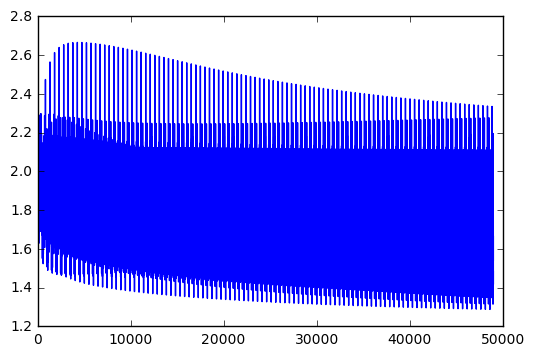

In [31]:
plt.plot(loss_arr)
plt.show()

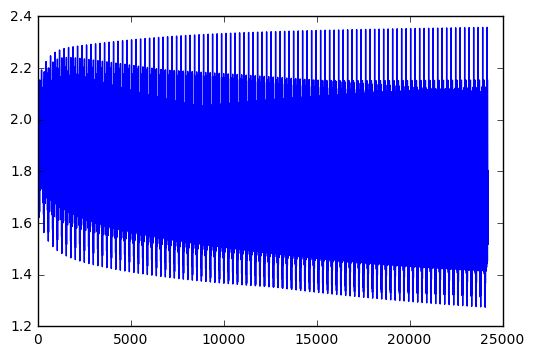

In [32]:
plt.plot(test_loss_arr)
plt.show()

In [33]:
make_classification_report(simple_model, X_train, Y_train, X_test, Y_test, batch_size=100)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.49      0.58      0.53      1125
          1       0.37      0.28      0.32      1300
          2       0.32      0.50      0.39      1428
          3       0.31      0.26      0.28      1224
          4       0.31      0.16      0.21       969
          5       0.32      0.47      0.38       984
          6       0.33      0.14      0.20       700
          7       0.00      0.00      0.00       103

avg / total       0.34      0.35      0.33      7833

('Accuracy', 0.35184475935146176)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.44      0.54      0.48       541
          1       0.34      0.25      0.29       633
          2       0.30      0.45      0.36       739
          3       0.25      0.21      0.23       594
          4       0.25      0.15      0.18       439
          5       0.31      0.44      0.37       508
          6       0.3

/Users/penzardmitry/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1109: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [250]:
np.bincount(Y_aim_new)

array([1684, 1952, 2178, 1827, 1411, 1528,  960,  152])

Заметим, что классы F8(6) и F7(7) представлены слабее остальных, попробуем их объединить

In [34]:
Y_aim_new = Y_aim.copy()

In [35]:
Y_aim_new[Y_aim_new==7] = 6

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_aim_new, test_size=0.33)

In [39]:
simple_model = nn.Sequential(nn.Linear(126, 7), nn.LogSoftmax())
criterion = nn.NLLLoss()
learning_rate = 1e-4

optimizer = Adam(simple_model.parameters(), lr=learning_rate)


loss_arr, test_loss_arr = learn_on_model( X_train, Y_train, simple_model, criterion, optimizer, X_test,\
                                                    Y_test,\
                                                    learning_rate,\
                                                    max_epoch_num=100, batch_size =16)

Execution take 46.2548069954


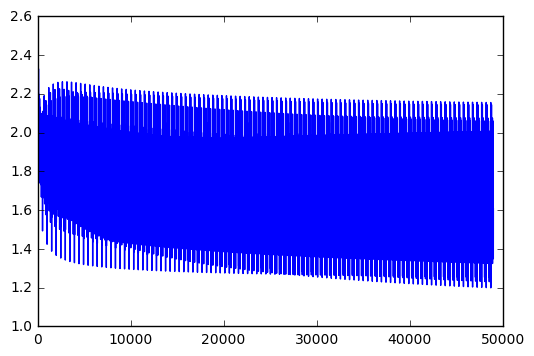

In [40]:
plt.plot(loss_arr)
plt.show()

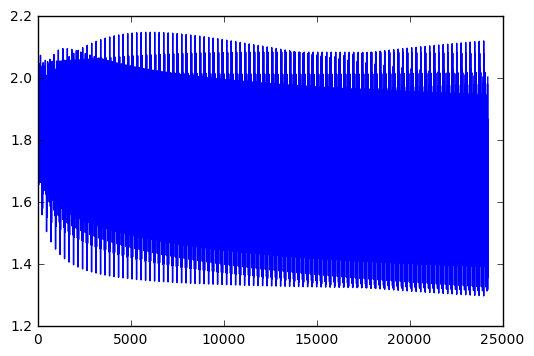

In [41]:
plt.plot(test_loss_arr)
plt.show()

In [42]:
make_classification_report(simple_model, X_train, Y_train, X_test, Y_test, batch_size=100)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.50      0.50      0.50      1079
          1       0.38      0.36      0.37      1291
          2       0.31      0.53      0.39      1481
          3       0.27      0.18      0.22      1242
          4       0.34      0.04      0.08       919
          5       0.33      0.39      0.36      1013
          6       0.36      0.38      0.37       808

avg / total       0.35      0.35      0.33      7833

('Accuracy', 0.35210008936550491)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.50      0.48      0.49       587
          1       0.31      0.28      0.30       642
          2       0.26      0.48      0.34       686
          3       0.22      0.16      0.19       576
          4       0.24      0.03      0.05       489
          5       0.31      0.37      0.33       479
          6       0.35      0.40      0.37       400

avg / total       0.

Не улучшило - так делать не будем

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_aim, test_size=0.33)

Попробуем XGBoost

In [44]:
import xgboost as xgb

In [51]:
ind_params = {'max_depth': 4, 'min_child_weight': 1,
             'subsample': 0.8,
             'colsample_bytree': 0.33, 'n_estimators': 100,
             'seed':0, 'objective': 'binary:logistic', 'learning_rate': 0.1
            }

In [52]:
classifier = xgb.XGBClassifier(**ind_params)


In [53]:
classifier.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.33,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [54]:
print "Train report"
print classification_report(classifier.predict(X_train), Y_train)
print "Test report"
print classification_report(classifier.predict(X_test), Y_test)

Train report
             precision    recall  f1-score   support

          0       0.75      0.75      0.75      1104
          1       0.72      0.67      0.70      1387
          2       0.72      0.62      0.66      1679
          3       0.64      0.62      0.63      1277
          4       0.48      0.84      0.61       528
          5       0.73      0.63      0.68      1161
          6       0.69      0.76      0.73       643
          7       0.49      1.00      0.65        54

avg / total       0.69      0.68      0.68      7833

Test report
             precision    recall  f1-score   support

          0       0.54      0.52      0.53       576
          1       0.37      0.36      0.36       666
          2       0.40      0.33      0.36       856
          3       0.30      0.24      0.27       688
          4       0.10      0.25      0.14       190
          5       0.38      0.31      0.34       599
          6       0.35      0.43      0.38       279
          7      

Он у нас и будет baseline  в дальнейшем

In [55]:
model_3linear = nn.Sequential(nn.Linear(126, 72), nn.Tanh(), nn.Linear(72, 32), nn.Tanh(), nn.Linear(32, 8),\
                              nn.LogSoftmax())

In [56]:
criterion = nn.NLLLoss()
learning_rate = 1e-4

optimizer = Adam(model_3linear.parameters(), lr=learning_rate)


loss_arr, test_loss_arr = learn_on_model( X_train, Y_train, model_3linear, criterion, optimizer, X_test,\
                                                    Y_test,\
                                                    learning_rate,\
                                                    max_epoch_num=100, batch_size =16)

Execution take 91.0360319614


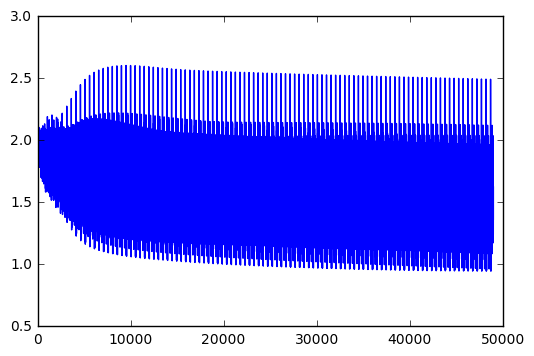

In [57]:
plt.plot(loss_arr)
plt.show()

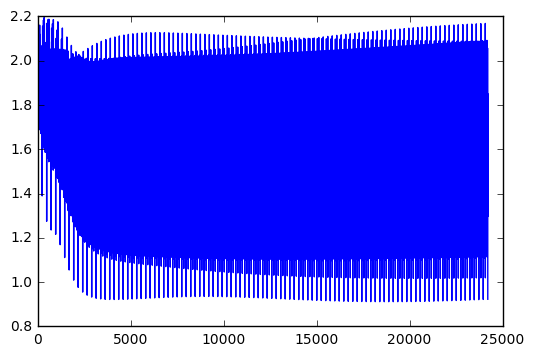

In [58]:
plt.plot(test_loss_arr)
plt.show()

In [59]:
make_classification_report(model_3linear, X_train, Y_train, X_test, Y_test, batch_size=100)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.59      0.52      0.56      1103
          1       0.41      0.49      0.45      1294
          2       0.40      0.39      0.40      1453
          3       0.35      0.42      0.38      1249
          4       0.29      0.15      0.19       916
          5       0.36      0.49      0.42       999
          6       0.42      0.34      0.37       708
          7       0.00      0.00      0.00       111

avg / total       0.40      0.40      0.40      7833

('Accuracy', 0.40495340227243715)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.56      0.49      0.53       563
          1       0.35      0.44      0.39       639
          2       0.36      0.32      0.34       714
          3       0.30      0.38      0.34       569
          4       0.27      0.12      0.17       492
          5       0.32      0.48      0.39       493
          6       0.3

In [146]:
nucl_dict = {"A" : 0, "U" : 1, "G" : 2, "C" : 3}

def nucl_string_to_numpy(string, right_offset=3):
    return [nucl_dict[x] for x in string[:len(string)-right_offset]]

In [147]:
sequences = pd.read_excel("nar-01502-y-2016-File012.xls")["Sequence"]

In [148]:
X = np.zeros((len(sequences), len(sequences[0]) - 3), dtype=np.uint8)
for ind, x in enumerate(sequences.apply(nucl_string_to_numpy)):
    X[ind] = np.array(x, dtype=np.uint8)

Модифицируем функцию, чтобы она правильно приводила X 

In [269]:
@print_work_time
def learn_on_model(X, Y, model, loss_fn, X_test = None, Y_test = None, learning_rate = 1e-2, 
                   batch_size = 100, max_epoch_num = 1, min_loss = 1e-3): 
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)    
    loss = 1000
    epoch_num = 0
     
    loss_arr = list()

    test_loss_arr = list() if not (type(X_test) is None) else None
    tot_err = 10**6
    
    while tot_err > min_loss and epoch_num < max_epoch_num:
        tot_err = 0
        sys.stdout.write("\nEpoch {} ...\n".format(epoch_num + 1))
        for bn, start in enumerate(xrange(0, X.shape[0], batch_size)):
            optimizer.zero_grad()
            if bn % 10 == 0:
                sys.stdout.write("\rTrain Batch {}".format(bn))
           
            X_CUR = Variable(torch.from_numpy(X[start:start + batch_size]).type(torch.LongTensor))
           
            Y_CUR = Variable(torch.from_numpy(Y[start:start + batch_size]).type(torch.LongTensor), requires_grad=False)
            output =  model.forward(X_CUR)
            loss = loss_fn(output, Y_CUR)
            loss_arr.append(loss.data.tolist()[0])
            tot_err += loss
            loss.backward()
            optimizer.step()
            del loss
            del X_CUR
            del Y_CUR
            del output

        
        if not (type(X_test) is None):
            for bn, start in enumerate(xrange(0, X_test.shape[0], batch_size)):
                if bn % 10 == 0:
                    sys.stdout.write("\rTest Batch {}".format(bn))
                X_CUR = Variable(torch.from_numpy(X_test[start:start + batch_size]).type(torch.LongTensor))
                Y_CUR = Variable(torch.from_numpy(Y_test[start:start + batch_size]).type(torch.LongTensor), requires_grad=False)
                y_pred = model.forward(X_CUR)
                loss = loss_fn(y_pred, Y_CUR)
                test_loss_arr.append(loss.data.tolist()[0])
                del X_CUR
                del Y_CUR
                del y_pred
                del loss
            
            
        epoch_num += 1
        gc.collect() # only this've helped to save process from beeing kill
        clear_output(wait=True)
    return np.array(loss_arr), np.array(test_loss_arr)


def make_classification_report(model, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, batch_size = 100):
    print ("Train report")
    y_predicted = np.zeros(shape = (Y_TRAIN.shape[0], len(np.unique(Y_TRAIN))))
    
    for bn, start in enumerate(xrange(0, X_TRAIN.shape[0], batch_size)):
        if bn % 100 == 0:
            sys.stdout.write("\rBatch {}".format(bn))
        X_CUR = Variable(torch.from_numpy(X_TRAIN[start:start + batch_size]).type(torch.LongTensor))
        y_predicted[start:start + batch_size] = np.array(model.forward(X_CUR).data.tolist())
    indices = np.argmax(y_predicted, axis = 1)
    print (classification_report(np.array(Y_TRAIN.tolist()), indices))
    print ("Accuracy", np.mean(np.array(Y_TRAIN.tolist()) == indices))
    
    print ("Test report")
    y_predicted = np.zeros(shape = (Y_TEST.shape[0], len(np.unique(Y_TRAIN))))
    for bn, start in enumerate(xrange(0, X_TEST.shape[0], batch_size)):
        if bn % 100 == 0:
            sys.stdout.write("\rBatch {}\n".format(bn))
        X_CUR = Variable(torch.from_numpy(X_TEST[start:start + batch_size]).type(torch.LongTensor))
        y_predicted[start:start + batch_size] = np.array(model.forward(X_CUR).data.tolist())
        del X_CUR
        
    
    
    indices = np.argmax(y_predicted, axis = 1)
    print (classification_report(np.array(Y_TEST.tolist()), indices))
    print ("Accuracy", np.mean(np.array(Y_TEST.tolist()) == indices))

In [150]:
class PromoterModel(nn.Module):
    def __init__(self, nucl_property_size, hidden_size, in_size=20, out_size=8):
        super(PromoterModel, self).__init__()
        
        self.nucl_property_size = nucl_property_size
        self.hidden_size = hidden_size
        self.coder = nn.Embedding(4, nucl_property_size) # A U G C
        self.full_connected = nn.Sequential(\
                                               nn.Linear(in_size * nucl_property_size, hidden_size),\
                                               nn.Tanh(),\
                                               nn.Linear(hidden_size, out_size),
                                               nn.LogSoftmax()
                                           )
    def forward(self, in_data):
        output = self.coder(in_data).view(in_data.size(0), -1)
        output = self.full_connected(output)
        return output
        
                                            

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_aim, test_size=0.33)

In [66]:
promotor_model1 = PromoterModel(30, 100)
criterion = nn.NLLLoss()
learning_rate = 1e-4

optimizer = Adam(promotor_model1.parameters(), lr=learning_rate)


loss_arr, test_loss_arr = learn_on_model( X_train, Y_train,promotor_model1, criterion, X_test,\
                                                    Y_test,\
                                                    learning_rate,\
                                                    max_epoch_num=15, batch_size =16)

Execution take 26.5156729221


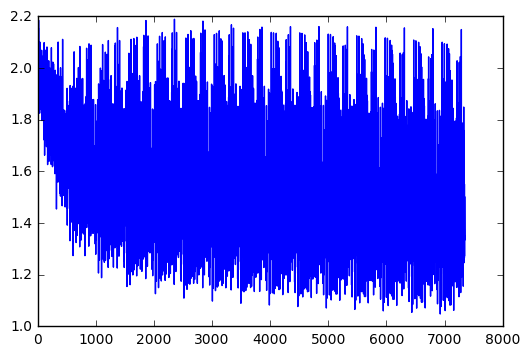

In [67]:
plt.plot(loss_arr)
plt.show()

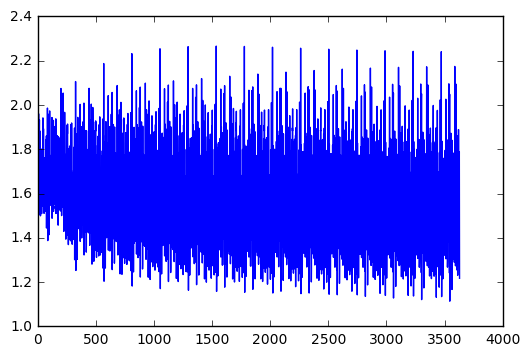

In [68]:
plt.plot(test_loss_arr)
plt.show()

In [69]:
make_classification_report(promotor_model1, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.52      0.68      0.59      1142
          1       0.43      0.46      0.45      1315
          2       0.45      0.37      0.40      1405
          3       0.37      0.41      0.39      1232
          4       0.39      0.30      0.34       940
          5       0.40      0.41      0.41       991
          6       0.47      0.49      0.48       707
          7       0.00      0.00      0.00       101

avg / total       0.43      0.44      0.43      7833

('Accuracy', 0.43738031405591726)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.48      0.68      0.56       524
          1       0.35      0.36      0.35       618
          2       0.39      0.29      0.33       762
          3       0.29      0.33      0.31       586
          4       0.26      0.21      0.23       468
          5       0.32      0.32      0.32       501
          6       0.3

In [70]:
class PromoterModel2(nn.Module):
    def __init__(self, nucl_property_size, hidden_size1, hidden_size2, in_size=20, out_size=8):
        super(PromoterModel2, self).__init__()
        self.nucl_property_size = nucl_property_size
        self.coder = nn.Embedding(4, nucl_property_size) # A U G C
        self.full_connected = nn.Sequential(\
                                               nn.Linear(in_size * nucl_property_size, hidden_size1),\
                                               nn.Tanh(),\
                                               nn.Linear(hidden_size1, hidden_size2),
                                               nn.Tanh(),
                                               nn.Linear(hidden_size2, out_size),
                                               nn.LogSoftmax()
                                           )
    def forward(self, in_data):
        output = self.coder(in_data).view(in_data.size(0), -1)
        output = self.full_connected(output)
        return output
        

In [71]:
promotor_model2 = PromoterModel2(64, 512, 64)
criterion = nn.NLLLoss()
learning_rate = 1e-4

optimizer = Adam(promotor_model2.parameters(), lr=learning_rate)


loss_arr, test_loss_arr = learn_on_model( X_train, Y_train,promotor_model2, criterion, X_test,\
                                                    Y_test,\
                                                    learning_rate,\
                                                    max_epoch_num=20, batch_size =8)

Execution take 428.796616077


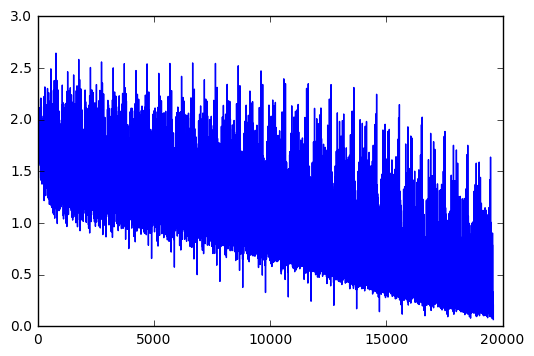

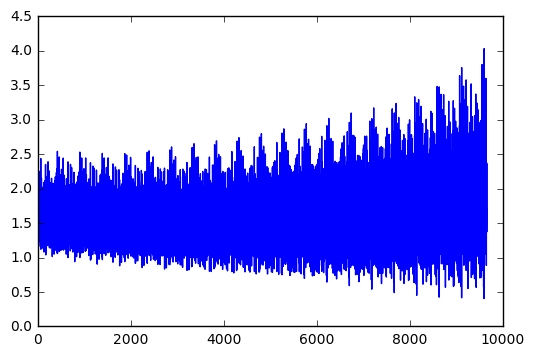

In [72]:
plt.plot(loss_arr)
plt.show()
plt.plot(test_loss_arr)
plt.show()

In [73]:
make_classification_report(promotor_model2, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.89      1.00      0.94      1142
          1       0.90      0.96      0.93      1315
          2       0.97      0.92      0.94      1405
          3       0.95      0.95      0.95      1232
          4       0.95      0.93      0.94       940
          5       0.97      0.89      0.93       991
          6       0.89      0.91      0.90       707
          7       1.00      0.48      0.64       101

avg / total       0.93      0.93      0.93      7833

('Accuracy', 0.93208221626452192)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.45      0.60      0.51       524
          1       0.33      0.39      0.36       618
          2       0.39      0.26      0.31       762
          3       0.32      0.39      0.35       586
          4       0.31      0.33      0.32       468
          5       0.44      0.32      0.37       501
          6       0.4

In [74]:
promotor_model3 = PromoterModel2(128, 1024, 32)
criterion = nn.NLLLoss()
learning_rate = 1e-4

optimizer = Adam(promotor_model3.parameters(), lr=learning_rate)


loss_arr, test_loss_arr = learn_on_model( X_train, Y_train,promotor_model3, criterion, X_test,\
                                                    Y_test,\
                                                    learning_rate,\
                                                    max_epoch_num=20, batch_size =8)

Execution take 1496.18539786


In [75]:
make_classification_report(promotor_model2, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.89      1.00      0.94      1142
          1       0.90      0.96      0.93      1315
          2       0.97      0.92      0.94      1405
          3       0.95      0.95      0.95      1232
          4       0.95      0.93      0.94       940
          5       0.97      0.89      0.93       991
          6       0.89      0.91      0.90       707
          7       1.00      0.48      0.64       101

avg / total       0.93      0.93      0.93      7833

('Accuracy', 0.93208221626452192)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.45      0.60      0.51       524
          1       0.33      0.39      0.36       618
          2       0.39      0.26      0.31       762
          3       0.32      0.39      0.35       586
          4       0.31      0.33      0.32       468
          5       0.44      0.32      0.37       501
          6       0.4

In [76]:
class PromoterModel3(nn.Module):
    def __init__(self, nucl_property_size, hidden_size1, hidden_size2, in_size=20, out_size=1):
        super(PromoterModel3, self).__init__()
        self.nucl_property_size = nucl_property_size
        self.coder = nn.Embedding(4, nucl_property_size) # A U G C
        self.full_connected = nn.Sequential(\
                                               nn.Linear(in_size * nucl_property_size, hidden_size1),\
                                               nn.PReLU(),\
                                               nn.Linear(hidden_size1, hidden_size2),
                                               nn.PReLU(),
                                               nn.Linear(hidden_size2, out_size),
                                               nn.Sigmoid()
                                           )
    def forward(self, in_data):
        output = self.coder(in_data).view(in_data.size(0), -1)
        output = self.full_connected(output)
        return output
        

In [270]:
X_energy = np.concatenate([pd.read_table(dt, skiprows=0).iloc[:, 1:] for dt in data_tables], axis = 1 )
#X_seq = X

In [271]:
X = np.concatenate([X_seq, X_energy], axis = 1)

In [274]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_aim, test_size=0.33)

In [275]:
X_train.shape

(7833, 146)

In [609]:
class PromoterModel4(nn.Module):
    def __init__(self, nucl_property_size, hidden_size1, hidden_size2, in_size = 146,  seq_size=20, out_size=8):
        super(PromoterModel4, self).__init__()
        self.nucl_property_size = nucl_property_size
        self.coder = nn.Embedding(4, nucl_property_size) # A U G C
        self.full_connected = nn.Sequential(\
                                               nn.Linear( in_size - seq_size +seq_size * nucl_property_size,\
                                                         hidden_size1),\
                                               nn.Tanh(),\
                                               nn.Linear(hidden_size1, hidden_size2),
                                               nn.Tanh(),
                                               nn.Linear(hidden_size2, out_size),
                                               nn.LogSoftmax()
                                           )
        self.seq_size = seq_size
    def forward(self, in_data):
        seq_info = in_data[:, :self.seq_size]
        
        output = self.coder(seq_info.type(torch.LongTensor)).view(seq_info.size(0), -1)
        output = torch.cat((output.type(torch.FloatTensor), in_data[:,self.seq_size:] ), 1)
        output = self.full_connected(output)
        return output
        

In [87]:
promotor_model4 = PromoterModel4(64, 128, 32)
criterion = nn.NLLLoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(promotor_model4.parameters(), lr=learning_rate, weight_decay=1e-2)


loss_arr, test_loss_arr = learn_on_model( X_train, Y_train,promotor_model4, criterion, optimizer, X_test,\
                                                    Y_test,\
                                                    learning_rate,\
                                                    max_epoch_num=100, batch_size =32)

Execution take 233.961699963


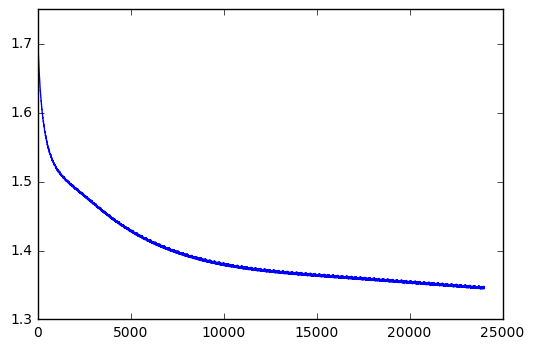

In [88]:
plt.plot([loss_arr[x-500:x].mean()  for x in range(500, loss_arr.shape[0], 1)])
plt.show()

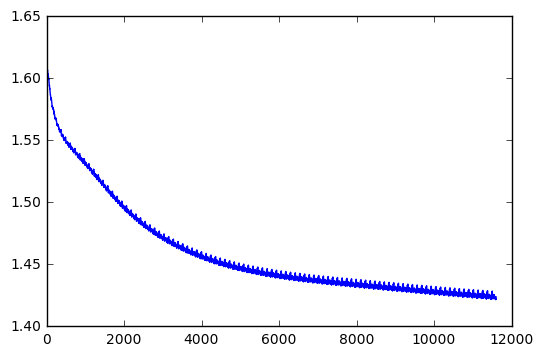

In [89]:
plt.plot([test_loss_arr[x-500:x].mean()  for x in range(500, test_loss_arr.shape[0], 1)])
plt.show()

In [90]:
make_classification_report(promotor_model4, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.59      0.68      0.63      1120
          1       0.46      0.47      0.47      1286
          2       0.46      0.51      0.48      1482
          3       0.41      0.44      0.42      1222
          4       0.45      0.26      0.33       933
          5       0.50      0.58      0.54       987
          6       0.60      0.52      0.56       693
          7       0.00      0.00      0.00       110

avg / total       0.48      0.49      0.48      7833

('Accuracy', 0.48921230690667689)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.53      0.62      0.57       546
          1       0.42      0.43      0.42       647
          2       0.39      0.45      0.42       685
          3       0.37      0.38      0.37       596
          4       0.30      0.16      0.21       475
          5       0.43      0.51      0.47       505
          6       0.5

In [892]:
t = KNeighborsClassifier(n_neighbors=100)

In [893]:
t.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [894]:
print classification_report(t.predict(X_test), Y_test)

             precision    recall  f1-score   support

          0       0.37      0.42      0.39       471
          1       0.18      0.26      0.21       448
          2       0.34      0.21      0.26      1140
          3       0.21      0.20      0.21       656
          4       0.11      0.19      0.14       267
          5       0.20      0.24      0.22       429
          6       0.33      0.25      0.28       448
          7       0.00      0.00      0.00         0

avg / total       0.27      0.25      0.25      3859



/Users/penzardmitry/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1111: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [1007]:
class PromoterModel5(nn.Module):
    def __init__(self, nucl_property_size, hidden_size1, hidden_size2, in_size = 146,  seq_size=20, out_size=8):
        super(PromoterModel5, self).__init__()
        self.nucl_property_size = nucl_property_size
        self.coder = nn.Embedding(4, nucl_property_size) # A U G C
        self.full_connected = nn.Sequential(\
                                               nn.Linear( in_size - seq_size +seq_size * nucl_property_size,\
                                                         hidden_size1),\
                                               nn.PReLU(),\
                                               nn.Linear(hidden_size1, hidden_size2),
                                               nn.PReLU(),
                                               nn.Linear(hidden_size2, out_size),
                                               nn.LogSoftmax()
                                           )
        self.seq_size = seq_size
    def forward(self, in_data):
        seq_info = in_data[:, :self.seq_size]
        
        output = self.coder(seq_info.type(torch.LongTensor)).view(seq_info.size(0), -1)
        output = torch.cat((output.type(torch.FloatTensor), in_data[:,self.seq_size:] ), 1)
        output = self.full_connected(output)
        return output

In [1008]:
promotor_model5 = PromoterModel5(64, 128, 32)
criterion = nn.NLLLoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(promotor_model5.parameters(), lr=learning_rate, weight_decay=1e-2)


loss_arr, test_loss_arr = learn_on_model( X_train, Y_train,promotor_model5, criterion, optimizer, X_test,\
                                                    Y_test,\
                                                    learning_rate,\
                                                    max_epoch_num=100, batch_size =32)

Execution take 221.23099494


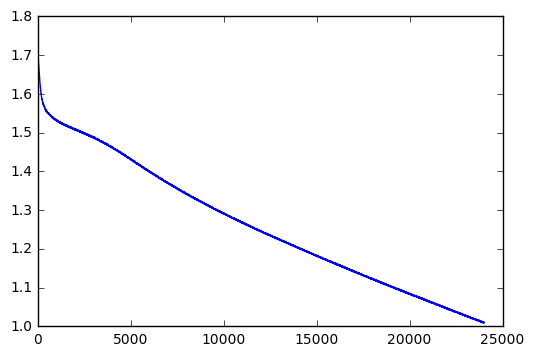

In [1009]:
plt.plot([loss_arr[x-500:x].mean()  for x in range(500, loss_arr.shape[0], 1)])
plt.show()

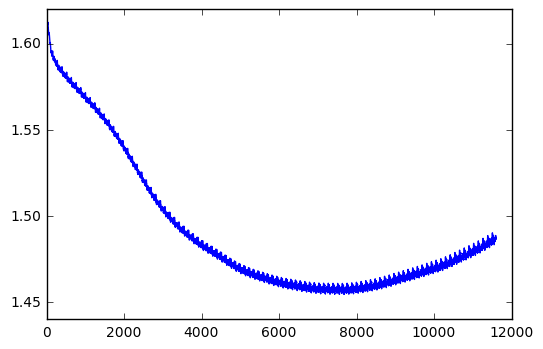

In [1010]:
plt.plot([test_loss_arr[x-500:x].mean()  for x in range(500, test_loss_arr.shape[0], 1)])
plt.show()

In [1011]:
make_classification_report(promotor_model5, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.82      0.78      0.80      1114
          1       0.67      0.72      0.69      1295
          2       0.70      0.66      0.68      1431
          3       0.59      0.66      0.62      1210
          4       0.56      0.49      0.52       962
          5       0.61      0.58      0.60       999
          6       0.60      0.75      0.67       709
          7       0.00      0.00      0.00       113

avg / total       0.65      0.65      0.65      7833

('Accuracy', 0.65390016596450917)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.53      0.53      0.53       552
          1       0.38      0.42      0.40       638
          2       0.40      0.35      0.37       736
          3       0.34      0.35      0.34       608
          4       0.30      0.29      0.30       446
          5       0.43      0.43      0.43       493
          6       0.5

In [91]:
class PromoterModel6(nn.Module):
    def __init__(self, nucl_property_size, hidden_size1, hidden_size2, hidden_size3,\
                 in_size = 146,  seq_size=20, out_size=8):
        super(PromoterModel6, self).__init__()
        self.nucl_property_size = nucl_property_size
        self.coder = nn.Embedding(4, nucl_property_size) # A U G C
        self.full_connected = nn.Sequential(\
                                               nn.Linear( in_size - seq_size +seq_size * nucl_property_size,\
                                                         hidden_size1),\
                                               nn.Tanh(),\
                                               nn.Dropout(p = 0.2),
                                               nn.Linear(hidden_size1, hidden_size2),
                                               nn.Dropout(p = 0.2),
                                               nn.Tanh(),
                                               nn.Linear(hidden_size2, hidden_size3),
                                               nn.Tanh(),
                                               nn.Dropout(p = 0.2),
                                               nn.Linear(hidden_size3, out_size),
                                               nn.LogSoftmax()
                                           )
        self.seq_size = seq_size
    def forward(self, in_data):
        seq_info = in_data[:, :self.seq_size]
        
        output = self.coder(seq_info.type(torch.LongTensor)).view(seq_info.size(0), -1)
        output = torch.cat((output.type(torch.FloatTensor), in_data[:,self.seq_size:] ), 1)
        output = self.full_connected(output)
        return output

In [94]:
promotor_model6 = PromoterModel6(64, 512, 256, 64)
criterion = nn.NLLLoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(promotor_model6.parameters(), lr=learning_rate, weight_decay=1e-2)


loss_arr, test_loss_arr = learn_on_model( X_train, Y_train,promotor_model6, criterion, optimizer, X_test,\
                                                    Y_test,\
                                                    learning_rate,\
                                                    max_epoch_num=50, batch_size =32)

Execution take 367.4258008


In [95]:
model.eval()
make_classification_report(promotor_model6, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.59      0.62      0.61      1120
          1       0.43      0.38      0.40      1286
          2       0.42      0.46      0.44      1482
          3       0.39      0.39      0.39      1222
          4       0.37      0.22      0.28       933
          5       0.39      0.55      0.46       987
          6       0.52      0.55      0.53       693
          7       0.00      0.00      0.00       110

avg / total       0.44      0.44      0.44      7833

('Accuracy', 0.44376356440699605)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.54      0.55      0.54       546
          1       0.41      0.37      0.39       647
          2       0.36      0.42      0.39       685
          3       0.34      0.34      0.34       596
          4       0.29      0.15      0.20       475
          5       0.38      0.54      0.45       505
          6       0.4

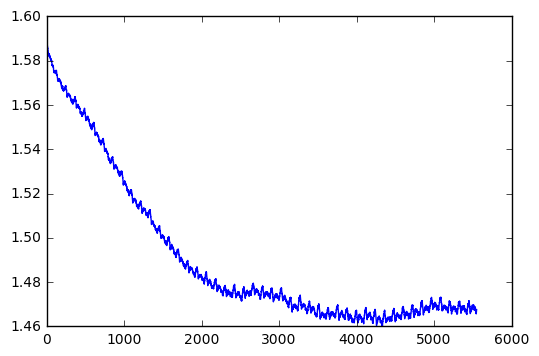

In [96]:
plt.plot([test_loss_arr[x-500:x].mean()  for x in range(500, test_loss_arr.shape[0], 1)])
plt.show()

In [14]:
nucl_string_to_numpy("augcuugc".upper(), 0)

[0, 1, 2, 3, 1, 1, 2, 3]

In [49]:
def onehot(sequence, offset):
    X = np.zeros(shape=(len(sequence) - offset, 4))
    for i, s in enumerate(sequence[0:len(sequence) - offset]):
        X[i, nucl_dict[s]] = 1
    return X

In [146]:
with open("promotors.txt") as promotors_file:
    promotors = [x.strip().replace("T", "U") for x in promotors_file if not "N" in x and not "K" in x and not "R" in x\
                and not "M" in x ]

In [147]:
X_prom = np.zeros(shape=(len(promotors), 20, 4))

In [155]:
for ind, promotor in enumerate(promotors):
    X_prom[ind] = onehot(promotor, 0)

In [268]:
@print_work_time
def learn_on_model(X, Y, model, loss_fn, optimizer, X_test = None, Y_test = None, learning_rate = 1e-2, 
                   batch_size = 100, max_epoch_num = 1, min_loss = 1e-3): 
    loss = 1000
    epoch_num = 0
     
    loss_arr = list()

    test_loss_arr = list() if not (type(X_test) is None) else None
    tot_err = 10**6
    
    while tot_err > min_loss and epoch_num < max_epoch_num:
        tot_err = 0
        sys.stdout.write("\nEpoch {} ...\n".format(epoch_num + 1))
        for bn, start in enumerate(xrange(0, X.shape[0], batch_size)):
            optimizer.zero_grad()
            if bn % 10 == 0:
                sys.stdout.write("\rTrain Batch {}".format(bn))
           
            X_CUR = Variable(torch.from_numpy(X[start:start + batch_size]).type(torch.FloatTensor))
           
            Y_CUR = Variable(torch.from_numpy(Y[start:start + batch_size]).type(torch.FloatTensor), requires_grad=False)
            output =  model.forward(X_CUR)
            loss = loss_fn(output, Y_CUR)
            loss_arr.append(loss.data.tolist()[0])
            tot_err += loss
            loss.backward()
            optimizer.step()
            del loss
            del X_CUR
            del Y_CUR
            del output

        
        if not (type(X_test) is None):
            for bn, start in enumerate(xrange(0, X_test.shape[0], batch_size)):
                if bn % 10 == 0:
                    sys.stdout.write("\rTest Batch {}".format(bn))
                X_CUR = Variable(torch.from_numpy(X_test[start:start + batch_size]).type(torch.FloatTensor))
                Y_CUR = Variable(torch.from_numpy(Y_test[start:start + batch_size]).type(torch.FloatTensor), requires_grad=False)
                y_pred = model.forward(X_CUR)
                loss = loss_fn(y_pred, Y_CUR)
                test_loss_arr.append(loss.data.tolist()[0])
                del X_CUR
                del Y_CUR
                del y_pred
                del loss
            
            
        epoch_num += 1
        gc.collect() # only this've helped to save process from beeing kill
        clear_output(wait=True)
    return np.array(loss_arr), np.array(test_loss_arr)


def make_classification_report(model, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, batch_size = 100):
    print ("Train report")
    y_predicted = np.zeros(shape = (Y_TRAIN.shape[0], len(np.unique(Y_TRAIN))))
    
    for bn, start in enumerate(xrange(0, X_TRAIN.shape[0], batch_size)):
        if bn % 100 == 0:
            sys.stdout.write("\rBatch {}".format(bn))
        X_CUR = Variable(torch.from_numpy(X_TRAIN[start:start + batch_size]).type(torch.FloatTensor))
        y_predicted[start:start + batch_size] = np.array(model.forward(X_CUR).data.tolist())
    indices = np.argmax(y_predicted, axis = 1)
    print (classification_report(np.array(Y_TRAIN.tolist()), indices))
    print ("Accuracy", np.mean(np.array(Y_TRAIN.tolist()) == indices))
    
    print ("Test report")
    y_predicted = np.zeros(shape = (Y_TEST.shape[0], len(np.unique(Y_TRAIN))))
    for bn, start in enumerate(xrange(0, X_TEST.shape[0], batch_size)):
        if bn % 100 == 0:
            sys.stdout.write("\rBatch {}\n".format(bn))
        X_CUR = Variable(torch.from_numpy(X_TEST[start:start + batch_size]).type(torch.FloatTensor))
        y_predicted[start:start + batch_size] = np.array(model.forward(X_CUR).data.tolist())
        del X_CUR
        
    
    
    indices = np.argmax(y_predicted, axis = 1)
    print (classification_report(np.array(Y_TEST.tolist()), indices))
    print ("Accuracy", np.mean(np.array(Y_TEST.tolist()) == indices))

In [203]:
X_prom.shape

(812906, 20, 4)

In [204]:


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
                            nn.Linear(80, 64),
                            nn.Tanh(),
                            nn.Linear(64, 32),\
                            nn.Tanh(),         
                            nn.Linear(32, 20),
                            nn.Tanh())
        self.decoder = nn.Sequential(nn.Linear(20, 32),
                                    nn.Tanh(),
                                    nn.Linear(32, 64),
                                    nn.Tanh(),
                                    nn.Linear(64, 80))
        
    def forward(self, in_data):
        in_data = in_data.view(in_data.size(0), -1)
        output = self.encoder(in_data)
        output = self.decoder(output)
        return output
        

In [205]:
X_train, X_test = train_test_split(X_prom, test_size=0.33)

In [206]:
autoencoder = AutoEncoder()
criterion = nn.MSELoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(autoencoder.parameters(), lr=learning_rate)


loss_arr, test_loss_arr = learn_on_model(X_train, X_train, autoencoder, criterion, optimizer, X_test,\
                                                    X_test,\
                                                    learning_rate,\
                                                    max_epoch_num=5, batch_size =32)

Execution take 216.25194788


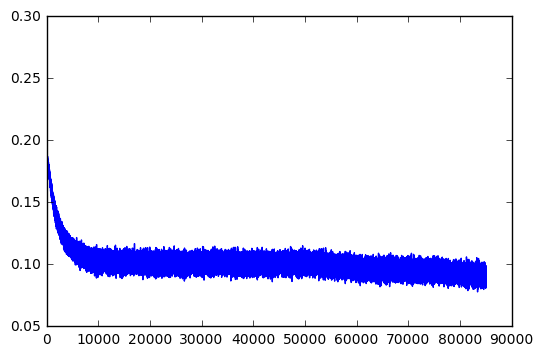

In [207]:
plt.plot(loss_arr)
plt.show()

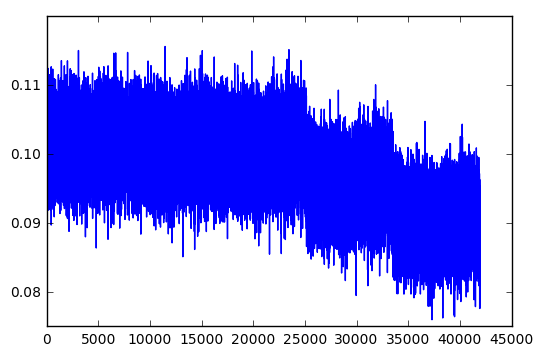

In [208]:
plt.plot(test_loss_arr)
plt.show()

In [2]:
sequences = pd.read_excel("nar-01502-y-2016-File012.xls")["Sequence"]

In [50]:
X = np.zeros((len(sequences), len(sequences[0]) - 3, 4), dtype=np.uint8)
for ind, x in enumerate(sequences.apply(lambda x: onehot(x, 3) )):
    X[ind] = np.array(x, dtype=np.uint8)

In [278]:
@print_work_time
def learn_on_model(X, Y, model, loss_fn,  optimizer, X_test = None, Y_test = None, learning_rate = 1e-2, 
                   batch_size = 100, max_epoch_num = 1, min_loss = 1e-3): 

    loss = 1000
    epoch_num = 0
     
    loss_arr = list()

    test_loss_arr = list() if not (type(X_test) is None) else None
    tot_err = 10**6
    
    while tot_err > min_loss and epoch_num < max_epoch_num:
        tot_err = 0
        sys.stdout.write("\nEpoch {} ...\n".format(epoch_num + 1))
        for bn, start in enumerate(xrange(0, X.shape[0], batch_size)):
            optimizer.zero_grad()
            if bn % 10 == 0:
                sys.stdout.write("\rTrain Batch {}".format(bn))
           
            X_CUR = Variable(torch.from_numpy(X[start:start + batch_size]).type(torch.FloatTensor))
           
            Y_CUR = Variable(torch.from_numpy(Y[start:start + batch_size]).type(torch.LongTensor), requires_grad=False)
            output =  model.forward(X_CUR)
            loss = loss_fn(output, Y_CUR)
            loss_arr.append(loss.data.tolist()[0])
            tot_err += loss
            loss.backward()
            optimizer.step()
            del loss
            del X_CUR
            del Y_CUR
            del output

        
        if not (type(X_test) is None):
            for bn, start in enumerate(xrange(0, X_test.shape[0], batch_size)):
                if bn % 10 == 0:
                    sys.stdout.write("\rTest Batch {}".format(bn))
                X_CUR = Variable(torch.from_numpy(X_test[start:start + batch_size]).type(torch.FloatTensor))
                Y_CUR = Variable(torch.from_numpy(Y_test[start:start + batch_size]).type(torch.LongTensor), requires_grad=False)
                y_pred = model.forward(X_CUR)
                loss = loss_fn(y_pred, Y_CUR)
                test_loss_arr.append(loss.data.tolist()[0])
                del X_CUR
                del Y_CUR
                del y_pred
                del loss
            
            
        epoch_num += 1
        gc.collect() # only this've helped to save process from beeing kill
        clear_output(wait=True)
    return np.array(loss_arr), np.array(test_loss_arr)


def make_classification_report(model, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, batch_size = 100):
    print ("Train report")
    y_predicted = np.zeros(shape = (Y_TRAIN.shape[0], len(np.unique(Y_TRAIN))))
    
    for bn, start in enumerate(xrange(0, X_TRAIN.shape[0], batch_size)):
        if bn % 100 == 0:
            sys.stdout.write("\rBatch {}".format(bn))
        X_CUR = Variable(torch.from_numpy(X_TRAIN[start:start + batch_size]).type(torch.FloatTensor))
        y_predicted[start:start + batch_size] = np.array(model.forward(X_CUR).data.tolist())
    indices = np.argmax(y_predicted, axis = 1)
    print (classification_report(np.array(Y_TRAIN.tolist()), indices))
    print ("Accuracy", np.mean(np.array(Y_TRAIN.tolist()) == indices))
    
    print ("Test report")
    y_predicted = np.zeros(shape = (Y_TEST.shape[0], len(np.unique(Y_TRAIN))))
    for bn, start in enumerate(xrange(0, X_TEST.shape[0], batch_size)):
        if bn % 100 == 0:
            sys.stdout.write("\rBatch {}\n".format(bn))
        X_CUR = Variable(torch.from_numpy(X_TEST[start:start + batch_size]).type(torch.FloatTensor))
        y_predicted[start:start + batch_size] = np.array(model.forward(X_CUR).data.tolist())
        del X_CUR
        
    
    
    indices = np.argmax(y_predicted, axis = 1)
    print (classification_report(np.array(Y_TEST.tolist()), indices))
    print ("Accuracy", np.mean(np.array(Y_TEST.tolist()) == indices))

In [212]:
X_cod = autoencoder.encoder(Variable(torch.from_numpy(X).type(torch.FloatTensor).view(X.shape[0], -1))).data.numpy()

In [213]:
X_train, X_test, Y_train, Y_test = train_test_split(X_cod, Y_aim, test_size=0.33)

In [216]:
cod_model = nn.Sequential(\
                         nn.Linear(20, 8),
                         nn.LogSoftmax()
                    )

In [217]:
criterion = nn.NLLLoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(cod_model.parameters(), lr=learning_rate)


loss_arr, test_loss_arr = learn_on_model(X_train, Y_train, cod_model, criterion, optimizer, X_test,\
                                                Y_test,\
                                                    learning_rate,\
                                                    max_epoch_num=50, batch_size =32)

Execution take 10.4465551376


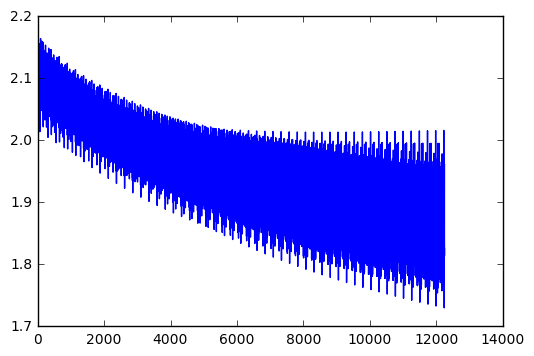

In [218]:
plt.plot(loss_arr)
plt.show()

In [108]:
?nn.GRU

In [112]:
_, hidden = nn.GRU(1, 40, 1, bidirectional=True)\
.forward(Variable(torch.FloatTensor(\
        [[ [1,0,0,0], [1,0,0,0] ]])).view(4, 2, 1))

In [155]:
a = Variable(torch.zeros(2, 80))



In [156]:
a[0] = hidden[:, 0, :]
a[1] = hidden[:, 1, :]

In [ ]:
num_layers * num_directions , batch , hidden_size
batch, values


In [246]:
class PromoterModel7(nn.Module):
    def __init__(self, hidden_size, first_size = 32, second_size =16, num_layers = 1, bidirectional=True):
        super(PromoterModel7, self).__init__()
        self.hidden_size = hidden_size
        self.encoder = nn.GRU(1, hidden_size, num_layers, bidirectional=bidirectional) # one-hot encoding is expected
        self.linear = nn.Sequential(
            nn.Linear(hidden_size * num_layers * 2, first_size),
            nn.Tanh(),
            nn.Linear(first_size, second_size),
            nn.Tanh(),
            nn.Linear(second_size, 8),
            nn.LogSoftmax()
            )
    def forward(self, sequence):
        hidden = Variable(torch.zeros(2, sequence.size(1), self.hidden_size))
        output, hidden = self.encoder(sequence, hidden)
        
        features = Variable(torch.zeros(hidden.size(1), hidden.size(0) * hidden.size(2)))
        for i in range(hidden.size(1)):
            features[i] = hidden[:, i, :]
        return self.linear.forward(features)

In [247]:
promotor_model = PromoterModel7(40)

In [248]:
X_rec = np.zeros((20, 11692, 1))

In [249]:
?nn.GRU

In [250]:
promotor_model.forward(Variable\
        (torch.from_numpy(X_rec[:, 0:2, :])).type(torch.FloatTensor))

Variable containing:
-2.0606 -1.9619 -2.1568 -2.2657 -2.0230 -1.7773 -2.3144 -2.1857
-2.0606 -1.9619 -2.1568 -2.2657 -2.0230 -1.7773 -2.3144 -2.1857
[torch.FloatTensor of size 2x8]

In [251]:
X_train, X_test, Y_train, Y_test = train_test_split(X_seq, Y_aim, test_size=0.33)

In [252]:
print X_train.shape
print X_test.shape

(7833, 20)
(3859, 20)


In [253]:
X_train_new = np.zeros((X_train.shape[1], X_train.shape[0], 1))
X_test_new = np.zeros((X_test.shape[1], X_test.shape[0], 1))

In [254]:
X_train = X_train_new
X_test = X_test_new

In [260]:
promotor_model = PromoterModel7(40)
loss_fn = nn.NLLLoss()
optimizer = Adam(promotor_model.parameters(), lr=1e-4)

In [261]:
train_loss_arr = []
test_loss_arr = []
epoch_num = 15
batch_size = 32
for epoch in range(epoch_num):
    sys.stdout.write("Epoch num {}\n".format(epoch))
    sys.stdout.write("\nTrain arr\n")
    for i in range(0, X_train.shape[1], batch_size):
        optimizer.zero_grad()
        X_cur = Variable(torch.from_numpy(X_train[:,i:i+batch_size,:]).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_train[i:i+batch_size]).type(torch.LongTensor))
        output = promotor_model.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        train_loss_arr.append(loss.data.numpy()[0])
        loss.backward()
        optimizer.step()
        sys.stdout.write("\rExample num {}".format(i))
    sys.stdout.write("\nTest arr\n")
    for i in range(0, X_test.shape[1], batch_size):
        X_cur = Variable(torch.from_numpy(X_test[:,i:i+batch_size,:]).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_test[i:i+batch_size]).type(torch.LongTensor))
        output = promotor_model.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        test_loss_arr.append(loss.data.numpy()[0])
        sys.stdout.write("\rExample num {}".format(i))
    clear_output(wait=True)
        

Epoch num 14

Train arr
Example num 7808
Test arr
Example num 3840

In [265]:
test_loss_arr = np.array(test_loss_arr)
train_loss_arr = np.array(train_loss_arr)

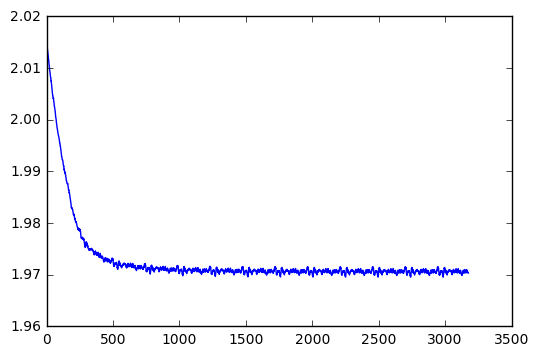

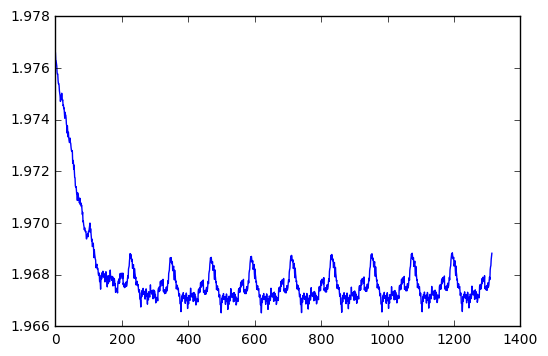

In [266]:
plt.plot([train_loss_arr[x-500:x].mean()  for x in range(500, train_loss_arr.shape[0], 1)])
plt.show()
plt.plot([test_loss_arr[x-500:x].mean()  for x in range(500, test_loss_arr.shape[0], 1)])
plt.show()

Сеть не обучается

Для лучшей модели попробуем подавать батчи так, чтобы они всегда содержали равное число представителей каждого класса (пусть по 4)
Обнаружил, что при этом сходимость остается, качество чуть падает, но сходимость намного плавнее - возникла идея добавить еще один слой! То, что было до этого можно проверить самим - достаточно вместо PromoterModel8 поставить 4.

In [276]:
X = np.concatenate([X_seq, X_energy], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_aim, test_size=0.33)

In [320]:
class PromoterModel8(nn.Module):
    def __init__(self, nucl_property_size, hidden_size1, hidden_size2, hidden_size3, in_size = 146,  seq_size=20, out_size=8):
        super(PromoterModel8, self).__init__()
        self.nucl_property_size = nucl_property_size
        self.coder = nn.Embedding(4, nucl_property_size) # A U G C
        self.full_connected = nn.Sequential(\
                                               nn.Linear( in_size - seq_size +seq_size * nucl_property_size,\
                                                         hidden_size1),\
                                               nn.Tanh(),\
                                               nn.Linear(hidden_size1, hidden_size2),
                                               nn.Tanh(),
                                               nn.Linear(hidden_size2, hidden_size3),
                                               nn.Tanh(),
                                               nn.Linear(hidden_size3, out_size),
                                               nn.LogSoftmax()
                                           )
        self.seq_size = seq_size
    def forward(self, in_data):
        seq_info = in_data[:, :self.seq_size]
        
        output = self.coder(seq_info.type(torch.LongTensor)).view(seq_info.size(0), -1)
        output = torch.cat((output.type(torch.FloatTensor), in_data[:,self.seq_size:] ), 1)
        output = self.full_connected(output)
        return output
        

In [328]:
promotor_model4 = PromoterModel8(64, 128, 64, 32)
criterion = nn.NLLLoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(promotor_model4.parameters(), lr=learning_rate, weight_decay=9e-3)

In [329]:
train_loss_arr = []
test_loss_arr = []
epoch_num = 20
batch_size = 32
batch_per_epoch = 500

X1 = X_train[Y_train == 0]
X2 = X_train[Y_train == 1]
X3 = X_train[Y_train == 2]
X4 = X_train[Y_train == 3]
X5 = X_train[Y_train == 4]
X6 = X_train[Y_train == 5]
X7 = X_train[Y_train == 6]
X8 = X_train[Y_train == 7]


for epoch in range(epoch_num):
    sys.stdout.write("Epoch num {}\n".format(epoch))
    sys.stdout.write("\nTrain arr\n")
    for i in range(batch_per_epoch):
        optimizer.zero_grad()
        X_cur = np.zeros( (batch_size, X_train.shape[1]))
        X_cur[0:4] = X1[np.random.choice(np.arange(X1.shape[0]), 4)]
        X_cur[4:8] = X2[np.random.choice(np.arange(X2.shape[0]), 4)]
        X_cur[8:12] = X3[np.random.choice(np.arange(X3.shape[0]), 4)]
        X_cur[12:16] = X4[np.random.choice(np.arange(X4.shape[0]), 4)]
        X_cur[16:20] = X5[np.random.choice(np.arange(X5.shape[0]), 4)]
        X_cur[20:24] = X6[np.random.choice(np.arange(X6.shape[0]), 4)]
        X_cur[24:28] = X7[np.random.choice(np.arange(X7.shape[0]), 4)]
        X_cur[28:32] = X8[np.random.choice(np.arange(X8.shape[0]), 4)]
        
        Y_cur = np.array([x for x in range(8) for y in range(4)])
        X_cur = Variable(torch.from_numpy(X_cur).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_cur).type(torch.LongTensor))
        output = promotor_model4.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        train_loss_arr.append(loss.data.numpy()[0])
        loss.backward()
        optimizer.step()
        sys.stdout.write("\rBatch num {}".format(i))
        

    sys.stdout.write("\nTest arr\n")
    for i in range(0, X_test.shape[0], batch_size):
        X_cur = Variable(torch.from_numpy(X_test[i:i+batch_size]).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_test[i:i+batch_size]).type(torch.LongTensor))
        output = promotor_model4.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        test_loss_arr.append(loss.data.numpy()[0])
        sys.stdout.write("\rExample num {}".format(i))
    clear_output(wait=True)

Epoch num 19

Train arr
Batch num 499
Test arr
Example num 3840

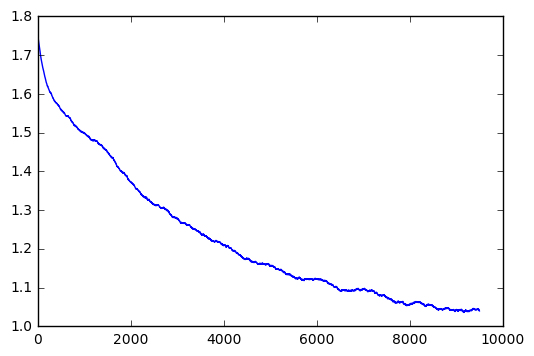

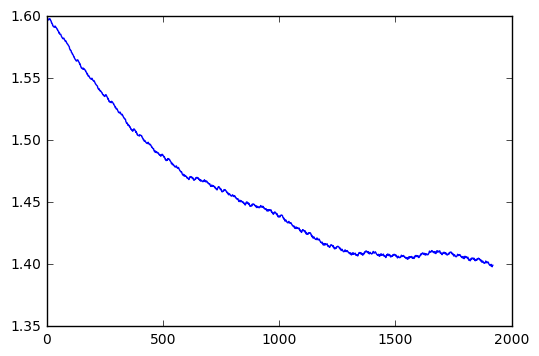

In [330]:
test_loss_arr = np.array(test_loss_arr)
train_loss_arr = np.array(train_loss_arr)
plt.plot([train_loss_arr[x-500:x].mean()  for x in range(500, train_loss_arr.shape[0], 1)])
plt.show()
plt.plot([test_loss_arr[x-500:x].mean()  for x in range(500, test_loss_arr.shape[0], 1)])
plt.show()

In [331]:
make_classification_report(promotor_model4, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.58      0.76      0.65      1137
          1       0.46      0.45      0.45      1249
          2       0.48      0.38      0.42      1428
          3       0.50      0.49      0.50      1234
          4       0.48      0.53      0.51       948
          5       0.66      0.56      0.61      1020
          6       0.74      0.83      0.78       714
          7       0.95      1.00      0.98       103

avg / total       0.55      0.55      0.55      7833

('Accuracy', 0.55317247542448611)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.51      0.71      0.60       529
          1       0.45      0.38      0.41       684
          2       0.44      0.34      0.38       739
          3       0.35      0.36      0.36       584
          4       0.34      0.39      0.36       460
          5       0.42      0.41      0.42       472
          6       0.5

 Получилось!!! 0.43 (округлять, так 0.44)

In [337]:
class PromoterModel9(nn.Module):
    def __init__(self, nucl_property_size, hidden_size1, hidden_size2, hidden_size3,\
                 hidden_size4,
                 in_size = 146,  seq_size=20, out_size=8):
        super(PromoterModel9, self).__init__()
        self.nucl_property_size = nucl_property_size
        self.coder = nn.Embedding(4, nucl_property_size) # A U G C
        self.full_connected = nn.Sequential(\
                                               nn.Linear( in_size - seq_size +seq_size * nucl_property_size,\
                                                         hidden_size1),\
                                               nn.Tanh(),\
                                               nn.Linear(hidden_size1, hidden_size2),
                                               nn.Tanh(),
                                               nn.Linear(hidden_size2, hidden_size3),
                                               nn.Tanh(),
                                               nn.Linear(hidden_size3, hidden_size4),
                                               nn.Tanh(),
                                               nn.Linear(hidden_size4, out_size),
                                               nn.LogSoftmax()
                                           )
        self.seq_size = seq_size
    def forward(self, in_data):
        seq_info = in_data[:, :self.seq_size]
        
        output = self.coder(seq_info.type(torch.LongTensor)).view(seq_info.size(0), -1)
        output = torch.cat((output.type(torch.FloatTensor), in_data[:,self.seq_size:] ), 1)
        output = self.full_connected(output)
        return output
        

In [338]:


promotor_model4 = PromoterModel9(64, 256, 128, 64, 32)
criterion = nn.NLLLoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(promotor_model4.parameters(), lr=learning_rate, weight_decay=9e-3)

In [339]:
train_loss_arr = []
test_loss_arr = []
epoch_num = 20
batch_size = 32
batch_per_epoch = 500

X1 = X_train[Y_train == 0]
X2 = X_train[Y_train == 1]
X3 = X_train[Y_train == 2]
X4 = X_train[Y_train == 3]
X5 = X_train[Y_train == 4]
X6 = X_train[Y_train == 5]
X7 = X_train[Y_train == 6]
X8 = X_train[Y_train == 7]


for epoch in range(epoch_num):
    sys.stdout.write("Epoch num {}\n".format(epoch))
    sys.stdout.write("\nTrain arr\n")
    for i in range(batch_per_epoch):
        optimizer.zero_grad()
        X_cur = np.zeros( (batch_size, X_train.shape[1]))
        X_cur[0:4] = X1[np.random.choice(np.arange(X1.shape[0]), 4)]
        X_cur[4:8] = X2[np.random.choice(np.arange(X2.shape[0]), 4)]
        X_cur[8:12] = X3[np.random.choice(np.arange(X3.shape[0]), 4)]
        X_cur[12:16] = X4[np.random.choice(np.arange(X4.shape[0]), 4)]
        X_cur[16:20] = X5[np.random.choice(np.arange(X5.shape[0]), 4)]
        X_cur[20:24] = X6[np.random.choice(np.arange(X6.shape[0]), 4)]
        X_cur[24:28] = X7[np.random.choice(np.arange(X7.shape[0]), 4)]
        X_cur[28:32] = X8[np.random.choice(np.arange(X8.shape[0]), 4)]
        
        Y_cur = np.array([x for x in range(8) for y in range(4)])
        X_cur = Variable(torch.from_numpy(X_cur).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_cur).type(torch.LongTensor))
        output = promotor_model4.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        train_loss_arr.append(loss.data.numpy()[0])
        loss.backward()
        optimizer.step()
        sys.stdout.write("\rBatch num {}".format(i))
        

    sys.stdout.write("\nTest arr\n")
    for i in range(0, X_test.shape[0], batch_size):
        X_cur = Variable(torch.from_numpy(X_test[i:i+batch_size]).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_test[i:i+batch_size]).type(torch.LongTensor))
        output = promotor_model4.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        test_loss_arr.append(loss.data.numpy()[0])
        sys.stdout.write("\rExample num {}".format(i))
    clear_output(wait=True)

Epoch num 19

Train arr
Batch num 499
Test arr
Example num 3840

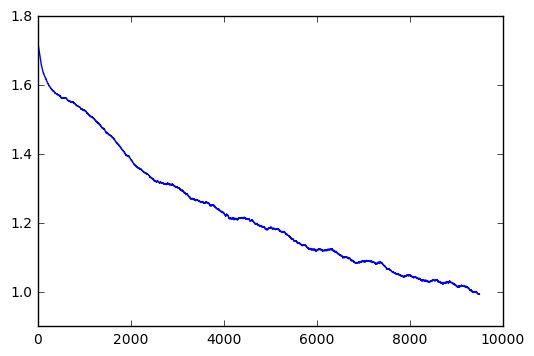

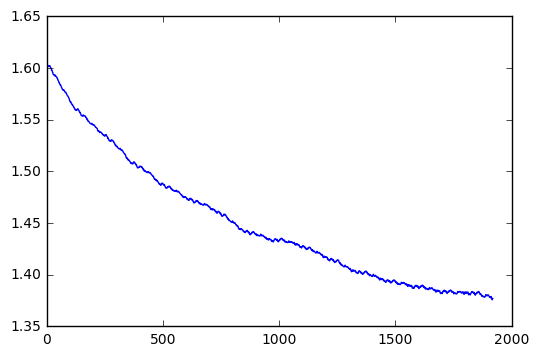

In [340]:
test_loss_arr = np.array(test_loss_arr)
train_loss_arr = np.array(train_loss_arr)
plt.plot([train_loss_arr[x-500:x].mean()  for x in range(500, train_loss_arr.shape[0], 1)])
plt.show()
plt.plot([test_loss_arr[x-500:x].mean()  for x in range(500, test_loss_arr.shape[0], 1)])
plt.show()

In [341]:
make_classification_report(promotor_model4, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.62      0.71      0.66      1137
          1       0.48      0.50      0.49      1249
          2       0.52      0.45      0.48      1428
          3       0.55      0.57      0.56      1234
          4       0.58      0.63      0.61       948
          5       0.71      0.60      0.65      1020
          6       0.77      0.80      0.78       714
          7       0.97      0.98      0.98       103

avg / total       0.59      0.59      0.59      7833

('Accuracy', 0.5941529426784119)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.53      0.63      0.58       529
          1       0.44      0.40      0.42       684
          2       0.44      0.37      0.40       739
          3       0.38      0.42      0.40       584
          4       0.33      0.38      0.35       460
          5       0.45      0.41      0.43       472
          6       0.56

In [430]:
class PromoterModel10(nn.Module):
    def __init__(self, nucl_property_size, hidden_size1, hidden_size2, hidden_size3,\
                 hidden_size4,
                 in_size = 146,  seq_size=20, out_size=8):
        super(PromoterModel10, self).__init__()
        self.nucl_property_size = nucl_property_size
        self.coder = nn.Embedding(4, nucl_property_size) # A U G C
        self.full_connected = nn.Sequential(\
                                               nn.Linear( in_size - seq_size +seq_size * nucl_property_size,\
                                                         hidden_size1),\
                                               nn.Tanh(),\
                                               nn.Dropout(p=0.3),
                                               nn.Linear(hidden_size1, hidden_size2),
                                               nn.Tanh(),
                                               nn.Dropout(p=0.3),
                                               nn.Linear(hidden_size2, hidden_size3),
                                               nn.Tanh(),
                                               nn.Dropout(p=0.3),
                                               nn.Linear(hidden_size3, hidden_size4),
                                               nn.Tanh(),
                                               nn.Dropout(p=0.3),
                                               nn.Linear(hidden_size4, out_size),
                                               nn.LogSoftmax()
                                           )

        self.seq_size = seq_size
    def forward(self, in_data):
        seq_info = in_data[:, :self.seq_size]
        
        output = self.coder(seq_info.type(torch.LongTensor)).view(seq_info.size(0), -1)
        output = torch.cat((output.type(torch.FloatTensor), in_data[:,self.seq_size:] ), 1)
        output = self.full_connected(output)
        return output
        

In [449]:


promotor_model4 = PromoterModel10(64, 512, 256, 128, 64)
criterion = nn.NLLLoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(promotor_model4.parameters(), lr=learning_rate, weight_decay=1e-3)

In [450]:
train_loss_arr = []
test_loss_arr = []
epoch_num = 20
batch_size = 32
batch_per_epoch = 500

X1 = X_train[Y_train == 0]
X2 = X_train[Y_train == 1]
X3 = X_train[Y_train == 2]
X4 = X_train[Y_train == 3]
X5 = X_train[Y_train == 4]
X6 = X_train[Y_train == 5]
X7 = X_train[Y_train == 6]
X8 = X_train[Y_train == 7]


for epoch in range(epoch_num):
    sys.stdout.write("Epoch num {}\n".format(epoch))
    sys.stdout.write("\nTrain arr\n")
    for i in range(batch_per_epoch):
        optimizer.zero_grad()
        X_cur = np.zeros( (batch_size, X_train.shape[1]))
        X_cur[0:4] = X1[np.random.choice(np.arange(X1.shape[0]), 4)]
        X_cur[4:8] = X2[np.random.choice(np.arange(X2.shape[0]), 4)]
        X_cur[8:12] = X3[np.random.choice(np.arange(X3.shape[0]), 4)]
        X_cur[12:16] = X4[np.random.choice(np.arange(X4.shape[0]), 4)]
        X_cur[16:20] = X5[np.random.choice(np.arange(X5.shape[0]), 4)]
        X_cur[20:24] = X6[np.random.choice(np.arange(X6.shape[0]), 4)]
        X_cur[24:28] = X7[np.random.choice(np.arange(X7.shape[0]), 4)]
        X_cur[28:32] = X8[np.random.choice(np.arange(X8.shape[0]), 4)]
        
        Y_cur = np.array([x for x in range(8) for y in range(4)])
        X_cur = Variable(torch.from_numpy(X_cur).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_cur).type(torch.LongTensor))
        output = promotor_model4.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        train_loss_arr.append(loss.data.numpy()[0])
        loss.backward()
        optimizer.step()
        sys.stdout.write("\rBatch num {}".format(i))
        

    sys.stdout.write("\nTest arr\n")
    for i in range(0, X_test.shape[0], batch_size):
        X_cur = Variable(torch.from_numpy(X_test[i:i+batch_size]).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_test[i:i+batch_size]).type(torch.LongTensor))
        output = promotor_model4.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        test_loss_arr.append(loss.data.numpy()[0])
        sys.stdout.write("\rExample num {}".format(i))
    clear_output(wait=True)

Epoch num 19

Train arr
Batch num 499
Test arr
Example num 3840

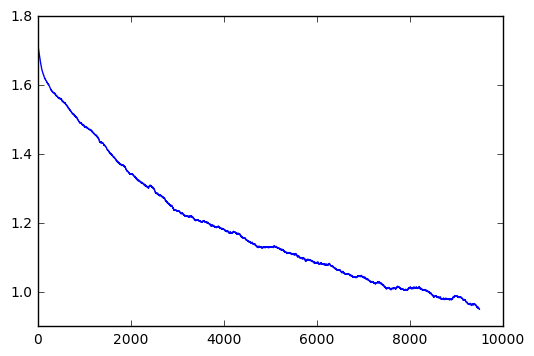

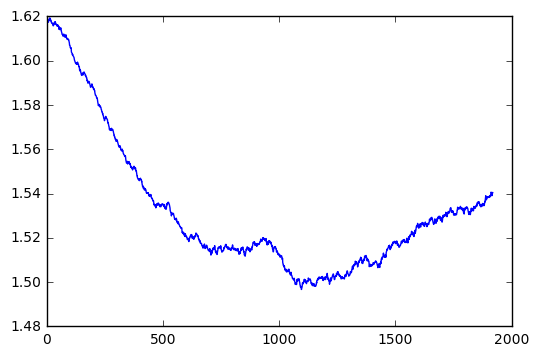

In [451]:
test_loss_arr = np.array(test_loss_arr)
train_loss_arr = np.array(train_loss_arr)
plt.plot([train_loss_arr[x-500:x].mean()  for x in range(500, train_loss_arr.shape[0], 1)])
plt.show()
plt.plot([test_loss_arr[x-500:x].mean()  for x in range(500, test_loss_arr.shape[0], 1)])
plt.show()

In [452]:
promotor_model4.eval()

PromoterModel10 (
  (coder): Embedding(4, 64)
  (full_connected): Sequential (
    (0): Linear (1406 -> 512)
    (1): Tanh ()
    (2): Dropout (p = 0.3)
    (3): Linear (512 -> 256)
    (4): Tanh ()
    (5): Dropout (p = 0.3)
    (6): Linear (256 -> 128)
    (7): Tanh ()
    (8): Dropout (p = 0.3)
    (9): Linear (128 -> 64)
    (10): Tanh ()
    (11): Dropout (p = 0.3)
    (12): Linear (64 -> 8)
    (13): LogSoftmax ()
  )
)

In [453]:
make_classification_report(promotor_model4, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.73      0.87      0.79      1137
          1       0.62      0.65      0.64      1249
          2       0.65      0.54      0.59      1428
          3       0.62      0.62      0.62      1234
          4       0.62      0.67      0.64       948
          5       0.80      0.66      0.73      1020
          6       0.82      0.87      0.85       714
          7       0.96      1.00      0.98       103

avg / total       0.69      0.69      0.68      7833

('Accuracy', 0.68658240776203239)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.52      0.64      0.58       529
          1       0.46      0.43      0.44       684
          2       0.44      0.37      0.40       739
          3       0.36      0.40      0.38       584
          4       0.35      0.40      0.37       460
          5       0.46      0.38      0.42       472
          6       0.5

In [612]:
promotor_model4 = PromoterModel10(64, 512, 256, 128, 64)

In [487]:
promotor_model4 = PromoterModel10(64, 512, 256, 128, 64)
criterion = nn.NLLLoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(promotor_model4.parameters(), lr=learning_rate, weight_decay=1e-3)

In [488]:
train_loss_arr = []
test_loss_arr = []
epoch_num = 10
batch_size = 64
batch_per_epoch = 250

X1 = X_train[Y_train == 0]
X2 = X_train[Y_train == 1]
X3 = X_train[Y_train == 2]
X4 = X_train[Y_train == 3]
X5 = X_train[Y_train == 4]
X6 = X_train[Y_train == 5]
X7 = X_train[Y_train == 6]
X8 = X_train[Y_train == 7]


for epoch in range(epoch_num):
    sys.stdout.write("Epoch num {}\n".format(epoch))
    sys.stdout.write("\nTrain arr\n")
    promotor_model4.train()
    for i in range(batch_per_epoch):
        
        optimizer.zero_grad()
        X_cur = np.zeros( (batch_size, X_train.shape[1]))
        X_cur[0:8] = X1[np.random.choice(np.arange(X1.shape[0]), 8)]
        X_cur[8:16] = X2[np.random.choice(np.arange(X2.shape[0]), 8)]
        X_cur[16:24] = X3[np.random.choice(np.arange(X3.shape[0]), 8)]
        X_cur[24:32] = X4[np.random.choice(np.arange(X4.shape[0]), 8)]
        X_cur[32:40] = X5[np.random.choice(np.arange(X5.shape[0]), 8)]
        X_cur[40:48] = X6[np.random.choice(np.arange(X6.shape[0]), 8)]
        X_cur[48:56] = X7[np.random.choice(np.arange(X7.shape[0]), 8)]
        X_cur[56:64] = X8[np.random.choice(np.arange(X8.shape[0]), 8)]
        
        Y_cur = np.array([x for x in range(8) for y in range(8)])
        X_cur = Variable(torch.from_numpy(X_cur).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_cur).type(torch.LongTensor))
        output = promotor_model4.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        train_loss_arr.append(loss.data.numpy()[0])
        loss.backward()
        optimizer.step()
        sys.stdout.write("\rBatch num {}".format(i))
        
    promotor_model4.eval()
    sys.stdout.write("\nTest arr\n")
    for i in range(0, X_test.shape[0], batch_size):
        X_cur = Variable(torch.from_numpy(X_test[i:i+batch_size]).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_test[i:i+batch_size]).type(torch.LongTensor))
        output = promotor_model4.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        test_loss_arr.append(loss.data.numpy()[0])
        sys.stdout.write("\rExample num {}".format(i))
    
    clear_output(wait=True)
    

Epoch num 9

Train arr
Batch num 249
Test arr
Example num 3840

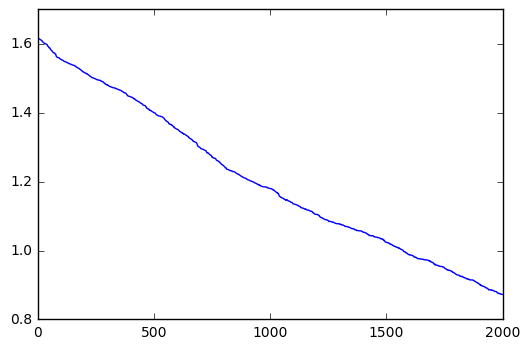

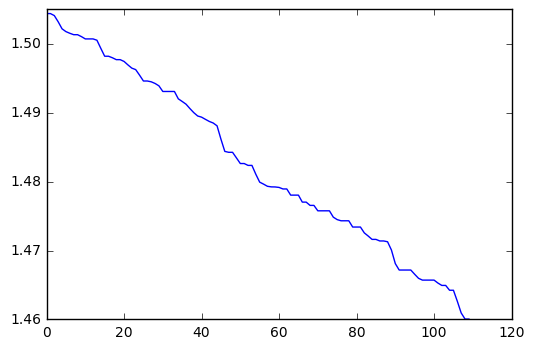

In [489]:
test_loss_arr = np.array(test_loss_arr)
train_loss_arr = np.array(train_loss_arr)
plt.plot([np.median(train_loss_arr[x-500:x])  for x in range(500, train_loss_arr.shape[0], 1)])
plt.show()
plt.plot([np.median(test_loss_arr[x-500:x])  for x in range(500, test_loss_arr.shape[0], 1)])
plt.show()

In [490]:
promotor_model4.eval()
make_classification_report(promotor_model4, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.73      0.75      0.74      1137
          1       0.57      0.66      0.61      1249
          2       0.61      0.50      0.55      1428
          3       0.61      0.61      0.61      1234
          4       0.63      0.68      0.65       948
          5       0.79      0.74      0.76      1020
          6       0.84      0.89      0.86       714
          7       0.98      1.00      0.99       103

avg / total       0.67      0.67      0.67      7833

('Accuracy', 0.6720285969615728)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.56      0.54      0.55       529
          1       0.45      0.49      0.47       684
          2       0.45      0.36      0.40       739
          3       0.37      0.40      0.38       584
          4       0.34      0.39      0.36       460
          5       0.44      0.42      0.43       472
          6       0.52

In [563]:
promotor_model4 = PromoterModel10(64, 512, 256, 128, 64)
criterion = nn.NLLLoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(promotor_model4.parameters(), lr=learning_rate, weight_decay=1e-3)

In [564]:
train_loss_arr = []
test_loss_arr = []
epoch_num = 15
batch_size = 128
batch_per_epoch = 125

X1 = X_train[Y_train == 0]
X2 = X_train[Y_train == 1]
X3 = X_train[Y_train == 2]
X4 = X_train[Y_train == 3]
X5 = X_train[Y_train == 4]
X6 = X_train[Y_train == 5]
X7 = X_train[Y_train == 6]
X8 = X_train[Y_train == 7]


for epoch in range(epoch_num):
    sys.stdout.write("Epoch num {}\n".format(epoch))
    sys.stdout.write("\nTrain arr\n")
    promotor_model4.train()
    for i in range(batch_per_epoch):
        
        optimizer.zero_grad()
        X_cur = np.zeros( (batch_size, X_train.shape[1]))
        X_cur[0:16] = X1[np.random.choice(np.arange(X1.shape[0]), 16)]
        X_cur[16:32] = X2[np.random.choice(np.arange(X2.shape[0]), 16)]
        X_cur[32:48] = X3[np.random.choice(np.arange(X3.shape[0]), 16)]
        X_cur[48:64] = X4[np.random.choice(np.arange(X4.shape[0]), 16)]
        X_cur[64:80] = X5[np.random.choice(np.arange(X5.shape[0]), 16)]
        X_cur[80:96] = X6[np.random.choice(np.arange(X6.shape[0]), 16)]
        X_cur[96:112] = X7[np.random.choice(np.arange(X7.shape[0]), 16)]
        X_cur[112:128] = X8[np.random.choice(np.arange(X8.shape[0]), 16)]
        
        Y_cur = np.array([x for x in range(8) for y in range(16)])
        X_cur = Variable(torch.from_numpy(X_cur).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_cur).type(torch.LongTensor))
        output = promotor_model4.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        train_loss_arr.append(loss.data.numpy()[0])
        loss.backward()
        optimizer.step()
        sys.stdout.write("\rBatch num {}".format(i))
        
    promotor_model4.eval()
    sys.stdout.write("\nTest arr\n")
    for i in range(0, X_test.shape[0], batch_size):
        X_cur = Variable(torch.from_numpy(X_test[i:i+batch_size]).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_test[i:i+batch_size]).type(torch.LongTensor))
        output = promotor_model4.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        test_loss_arr.append(loss.data.numpy()[0])
        sys.stdout.write("\rExample num {}".format(i))
    
    clear_output(wait=True)
    

Epoch num 14

Train arr
Batch num 124
Test arr
Example num 3840

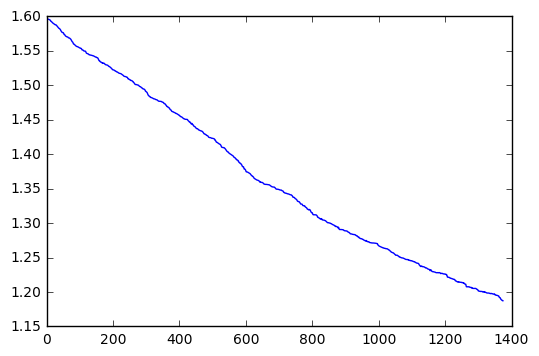

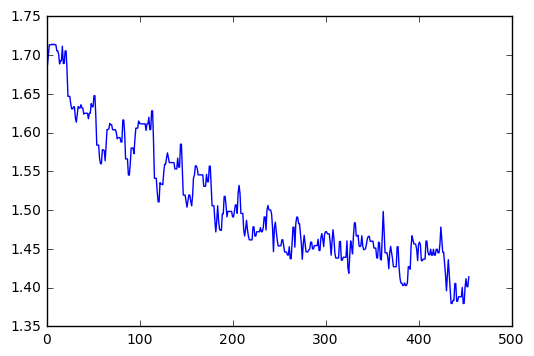

In [565]:
test_loss_arr = np.array(test_loss_arr)
train_loss_arr = np.array(train_loss_arr)
plt.plot([np.median(train_loss_arr[x-500:x])  for x in range(500, train_loss_arr.shape[0], 1)])
plt.show()
plt.plot([np.median(test_loss_arr[x-10:x])  for x in range(10, test_loss_arr.shape[0], 1)])
plt.show()

In [566]:
promotor_model4.eval()
make_classification_report(promotor_model4, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.57      0.76      0.66      1137
          1       0.45      0.46      0.46      1249
          2       0.50      0.39      0.44      1428
          3       0.52      0.48      0.50      1234
          4       0.48      0.49      0.48       948
          5       0.61      0.55      0.58      1020
          6       0.70      0.76      0.73       714
          7       0.97      1.00      0.99       103

avg / total       0.54      0.55      0.54      7833

('Accuracy', 0.54602323503127792)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.50      0.69      0.58       529
          1       0.43      0.40      0.42       684
          2       0.44      0.34      0.38       739
          3       0.35      0.35      0.35       584
          4       0.32      0.35      0.34       460
          5       0.43      0.43      0.43       472
          6       0.5

In [603]:
class PromoterModel11(nn.Module):
    def __init__(self, nucl_property_size, hidden_size1, hidden_size2, hidden_size3,\
                 hidden_size4, hidden_size5,
                 in_size = 146,  seq_size=20, out_size=8):
        super(PromoterModel11, self).__init__()
        self.nucl_property_size = nucl_property_size
        self.coder = nn.Embedding(4, nucl_property_size) # A U G C
        self.full_connected = nn.Sequential(\
                                               nn.Linear( in_size - seq_size +seq_size * nucl_property_size,\
                                                         hidden_size1),\
                                               nn.Tanh(),\
                                               nn.Dropout(p=0.2),
                                               nn.Linear(hidden_size1, hidden_size2),
                                               nn.Tanh(),
                                               nn.Dropout(p=0.2),
                                               nn.Linear(hidden_size2, hidden_size3),
                                               nn.Tanh(),
                                               nn.Dropout(p=0.2),
                                               nn.Linear(hidden_size3, hidden_size4),
                                               nn.Tanh(),
                                               nn.Dropout(p=0.2),
                                               nn.Linear(hidden_size4, hidden_size5),
                                               nn.Tanh(),
                                               nn.Dropout(p=0.2),
                                               nn.Linear(hidden_size5, out_size),
                                               nn.LogSoftmax()
                                           )

        self.seq_size = seq_size
    def forward(self, in_data):
        seq_info = in_data[:, :self.seq_size]
        
        output = self.coder(seq_info.type(torch.LongTensor)).view(seq_info.size(0), -1)
        output = torch.cat((output.type(torch.FloatTensor), in_data[:,self.seq_size:] ), 1)
        output = self.full_connected(output)
        return output
        

In [604]:
promotor_model5 = PromoterModel11(64, 512, 256, 128, 64, 32)
criterion = nn.NLLLoss(size_average=True)
learning_rate = 1e-4

optimizer = Adam(promotor_model5.parameters(), lr=learning_rate, weight_decay=1e-3)

In [605]:
train_loss_arr = []
test_loss_arr = []
epoch_num = 10
batch_size = 64
batch_per_epoch = 250

X1 = X_train[Y_train == 0]
X2 = X_train[Y_train == 1]
X3 = X_train[Y_train == 2]
X4 = X_train[Y_train == 3]
X5 = X_train[Y_train == 4]
X6 = X_train[Y_train == 5]
X7 = X_train[Y_train == 6]
X8 = X_train[Y_train == 7]


for epoch in range(epoch_num):
    sys.stdout.write("Epoch num {}\n".format(epoch))
    sys.stdout.write("\nTrain arr\n")
    promotor_model5.train()
    for i in range(batch_per_epoch):
        
        optimizer.zero_grad()
        X_cur = np.zeros( (batch_size, X_train.shape[1]))
        X_cur[0:8] = X1[np.random.choice(np.arange(X1.shape[0]), 8)]
        X_cur[8:16] = X2[np.random.choice(np.arange(X2.shape[0]), 8)]
        X_cur[16:24] = X3[np.random.choice(np.arange(X3.shape[0]), 8)]
        X_cur[24:32] = X4[np.random.choice(np.arange(X4.shape[0]), 8)]
        X_cur[32:40] = X5[np.random.choice(np.arange(X5.shape[0]), 8)]
        X_cur[40:48] = X6[np.random.choice(np.arange(X6.shape[0]), 8)]
        X_cur[48:56] = X7[np.random.choice(np.arange(X7.shape[0]), 8)]
        X_cur[56:64] = X8[np.random.choice(np.arange(X8.shape[0]), 8)]
        
        Y_cur = np.array([x for x in range(8) for y in range(8)])
        X_cur = Variable(torch.from_numpy(X_cur).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_cur).type(torch.LongTensor))
        output = promotor_model5.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        train_loss_arr.append(loss.data.numpy()[0])
        loss.backward()
        optimizer.step()
        sys.stdout.write("\rBatch num {}".format(i))
        
    promotor_model5.eval()
    sys.stdout.write("\nTest arr\n")
    for i in range(0, X_test.shape[0], batch_size):
        X_cur = Variable(torch.from_numpy(X_test[i:i+batch_size]).type(torch.FloatTensor))
        Y_cur = Variable(torch.from_numpy(Y_test[i:i+batch_size]).type(torch.LongTensor))
        output = promotor_model5.forward(X_cur)
        loss = loss_fn(output, Y_cur)
        test_loss_arr.append(loss.data.numpy()[0])
        sys.stdout.write("\rExample num {}".format(i))
    
    clear_output(wait=True)

Epoch num 9

Train arr
Batch num 249
Test arr
Example num 3840

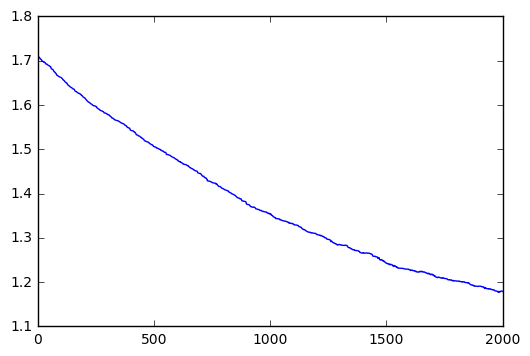

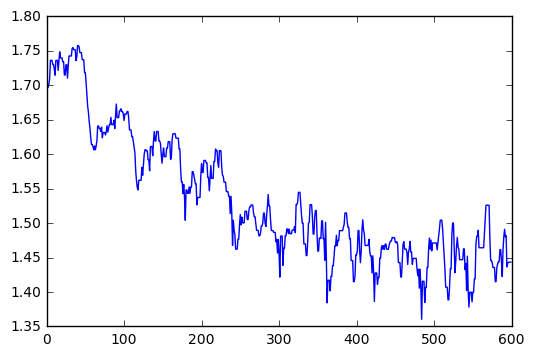

In [606]:
test_loss_arr = np.array(test_loss_arr)
train_loss_arr = np.array(train_loss_arr)
plt.plot([np.median(train_loss_arr[x-500:x])  for x in range(500, train_loss_arr.shape[0], 1)])
plt.show()
plt.plot([np.median(test_loss_arr[x-10:x])  for x in range(10, test_loss_arr.shape[0], 1)])
plt.show()

In [607]:
promotor_model5.eval()
make_classification_report(promotor_model5, X_train, Y_train, X_test, Y_test)

Train report
Batch 0             precision    recall  f1-score   support

          0       0.67      0.68      0.68      1137
          1       0.49      0.49      0.49      1249
          2       0.50      0.44      0.47      1428
          3       0.49      0.49      0.49      1234
          4       0.46      0.55      0.50       948
          5       0.56      0.40      0.47      1020
          6       0.58      0.81      0.68       714
          7       0.99      0.97      0.98       103

avg / total       0.54      0.54      0.53      7833

('Accuracy', 0.53912932465211283)
Test report
Batch 0
             precision    recall  f1-score   support

          0       0.54      0.55      0.54       529
          1       0.44      0.40      0.42       684
          2       0.43      0.36      0.39       739
          3       0.35      0.38      0.36       584
          4       0.32      0.41      0.36       460
          5       0.36      0.27      0.31       472
          6       0.4

In [610]:
promotor_model4 = PromoterModel4(64, 128, 32)

In [611]:
promotor_model4.eval()

PromoterModel4 (
  (coder): Embedding(4, 64)
  (full_connected): Sequential (
    (0): Linear (1406 -> 128)
    (1): Tanh ()
    (2): Linear (128 -> 32)
    (3): Tanh ()
    (4): Linear (32 -> 8)
    (5): LogSoftmax ()
  )
)